# DF EVENT

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_json('/content/df_all_events.json')

In [ ]:
df

,username,stock_code,event,original_timestamp
0,AGILCAHY48,ADMR,product_clicked,2023-04-30T18:25:34.441Z
1,AGILCAHY48,ALTO,product_clicked,2023-04-30T18:28:13.341Z
2,AGILCAHY48,DADA,product_clicked,2023-04-30T18:30:56.593Z
3,AGILCAHY48,BNBR,product_clicked,2023-05-02T01:08:57.571Z
4,AGILCAHY48,CARS,product_clicked,2023-05-02T01:16:09.222Z
...,...,...,...,...
10039,YOGINUGR26,BNGA,product_clicked,2023-05-23T02:21:46.897Z
10040,YOGINUGR26,BNGA,buy_stock,2023-05-23T02:22:07.377Z
10041,YOGINUGR26,BRIS,sell_stock,2023-05-24T01:59:41.276Z
10042,YOGINUGR26,BNGA,sell_stock,2023-05-24T02:00:34.117Z


In [ ]:
df.event.value_counts()

product_clicked              5362
buy_stock                    2329
sell_stock                   1406
stock_watchlist_initiated     698
product_detail_viewed         217
product_added                  32
Name: event, dtype: int64

In [ ]:
# Define custom function to calculate rating
def calculate_rating(group):

    relevant_maxn = {
        'product_clicked':5,
        'buy_stock':3,
        'sell_stock':2,
        'product_detail_viewed':2,
        'stock_watchlist_initiated':1
        }

    # Mapping of values to ratings
    weight_dict = {
        'product_clicked': 1,
        'stock_watchlist_initiated': 8,
        'buy_stock': 10,
        'sell_stock': 3,
        'product_detail_viewed':5,
        #'product_added':6
        }

    value_counts = group['event'].value_counts()
    #rating = min(value_counts.get('product_clicked',0), relevant_maxn['product_clicked']) * weight_dict['product_clicked'] + min(value_counts.get('stock_watchlist_initiated',0), relevant_maxn['stock_watchlist_initiated']) * weight_dict['stock_watchlist_initiated'] + min(value_counts.get('buy_stock',0), relevant_maxn['buy_stock']) * weight_dict['buy_stock'] + min(value_counts.get('sell_stock',0), relevant_maxn['sell_stock']) * weight_dict['sell_stock'] + min(value_counts.get('product_detail_viewed',0), relevant_maxn['product_detail_viewed']) * weight_dict['product_detail_viewed'] #+ value_counts.get('product_added',0) * weight_dict['product_added']
    rating = min(value_counts.get('product_clicked',0), relevant_maxn['product_clicked']) * weight_dict['product_clicked'] + min(value_counts.get('stock_watchlist_initiated',0), relevant_maxn['stock_watchlist_initiated']) * weight_dict['stock_watchlist_initiated'] + value_counts.get('buy_stock',0) * weight_dict['buy_stock'] + min(value_counts.get('sell_stock',0), relevant_maxn['sell_stock']) * weight_dict['sell_stock'] + min(value_counts.get('product_detail_viewed',0), relevant_maxn['product_detail_viewed']) * weight_dict['product_detail_viewed']
    return pd.Series({'rating': rating})

In [ ]:
# Apply the custom function to each group
df = df.groupby(['username', 'stock_code']).apply(calculate_rating).reset_index()

In [ ]:
import numpy as np

def scal_rating(df):

  ratingScal = np.zeros(len(df))

  for name in df.username.unique():

    idx = df[df['username'] == name].index.tolist()
    max_val = df['rating'][df['username'] == name].max()
    value = df['rating'][df['username'] == name].apply(lambda x: 5*(x/max_val)).values

    for k,v in enumerate(idx):
      ratingScal[v] = value[k]

  return ratingScal

In [ ]:
#df['ratingScal'] = df['rating'].apply(lambda x: 5*(x/df['rating'].max()))

In [ ]:
df['ratingScal'] = scal_rating(df)

In [ ]:
df

,username,stock_code,rating,ratingScal
0,AGILCAHY48,ADMR,1,5.000000
1,AGILCAHY48,ALTO,1,5.000000
2,AGILCAHY48,BNBR,1,5.000000
3,AGILCAHY48,CARS,1,5.000000
4,AGILCAHY48,DADA,1,5.000000
...,...,...,...,...
4008,YOGINUGR26,BMRI,10,0.199203
4009,YOGINUGR26,BNGA,28,0.557769
4010,YOGINUGR26,BRIS,251,5.000000
4011,YOGINUGR26,ELIT,231,4.601594


# DF BALANCE

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_user = pd.read_csv("/content/user_portfolio.csv", header=0)

In [ ]:
df_user

,clientportfolioclientid,clientportfoliostockid,clientportfoliobalance,clientportfoliodate,date_rank_per_user
0,0000003,FIMP,19000000.0,2023-05-05,1
1,01OLK,BOLT,100.0,2023-05-05,1
2,3,CASH,47051800.0,2022-03-28,1
3,ADANGWAH107,TLKM,100.0,2023-05-05,1
4,ADIN99,TRIM,100.0,2023-05-05,1
...,...,...,...,...,...
1427,YULISPRA20,BUKA,100.0,2023-05-05,1
1428,YULISPRA20,GOTO,100.0,2023-05-05,1
1429,YULISPRA20,PTPP,100.0,2023-05-05,1
1430,YUSUFARI20,SWID,100.0,2023-05-05,1


In [ ]:
df_user = df_user.drop_duplicates().reset_index(drop=True)

In [ ]:
df_user = df_user.copy().iloc[:,:3]

In [ ]:
df_user

,clientportfolioclientid,clientportfoliostockid,clientportfoliobalance
0,0000003,FIMP,19000000.0
1,01OLK,BOLT,100.0
2,3,CASH,47051800.0
3,ADANGWAH107,TLKM,100.0
4,ADIN99,TRIM,100.0
...,...,...,...
1426,YULISPRA20,BUKA,100.0
1427,YULISPRA20,GOTO,100.0
1428,YULISPRA20,PTPP,100.0
1429,YUSUFARI20,SWID,100.0


In [ ]:
# Make explicit rating for each user-item
def rating(df, column):
  rat = np.zeros(len(df))

  for i in df['clientportfolioclientid'].unique():

    idx = df[df['clientportfolioclientid']==i].index
    total_quantity = sum(df[column][df['clientportfolioclientid']==i])

    quantity = [1 + 4*(j/total_quantity) for j in df[column][df['clientportfolioclientid']==i]]

    for k,v in enumerate(idx):
      rat[v] = quantity[k]

  return rat

In [ ]:
rating_balance = rating(df_user, 'clientportfoliobalance')
#rating_std = rating(df_user, 'scaler_std')
#rating_minmax = rating(df_user, 'scaler_minmax')

In [ ]:
df_user['ratingBalance'] = rating_balance
#df_user['rating_std'] = rating_std
#df_user['rating_minmax'] = rating_minmax

In [ ]:
df_user

,clientportfolioclientid,clientportfoliostockid,clientportfoliobalance,ratingBalance
0,0000003,FIMP,19000000.0,5.000000
1,01OLK,BOLT,100.0,5.000000
2,3,CASH,47051800.0,5.000000
3,ADANGWAH107,TLKM,100.0,5.000000
4,ADIN99,TRIM,100.0,5.000000
...,...,...,...,...
1426,YULISPRA20,BUKA,100.0,1.307692
1427,YULISPRA20,GOTO,100.0,1.307692
1428,YULISPRA20,PTPP,100.0,1.307692
1429,YUSUFARI20,SWID,100.0,3.000000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

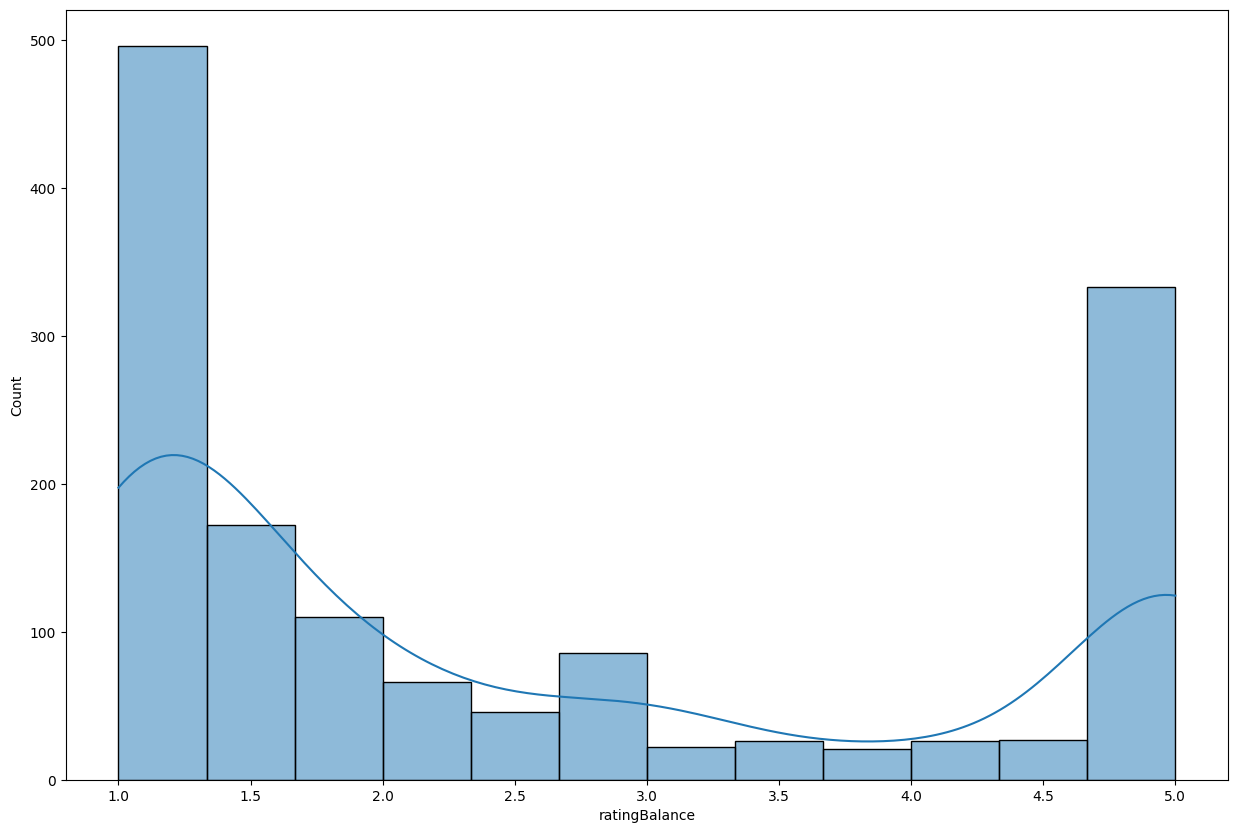

In [ ]:
plt.figure(figsize=(15, 10))
sns.histplot(data=df_user, x='ratingBalance', kde=True)
plt.show()

In [ ]:
a = df_user.groupby('clientportfolioclientid')['clientportfolioclientid'].count()

In [ ]:
a.loc[a>5]

clientportfolioclientid
AGUSTINU52       9
CH               7
CYS              6
FUZAHARI22       6
HENDRYWI65       6
MADAARYA103      6
OKI              9
PNAAAAYMW        9
PNAANA9U6        6
PNAARAHEM        6
PNAARAZ4H        6
PNAAZB8AG        7
PNACAA7QS        6
PNACAAQOL        6
PNADJAZOR        9
PNADOA47G        7
PNADOA6HB        8
PNAELA4L3        9
PNAEMA0C3       29
PNAFAAE8A        6
PNAGIAJCI        6
PNAHAAE0J      151
PNAHAB0VJ        6
PNAHEA2XA        6
PNAJEAMJ5        7
PNAJOA1QV        7
PNAJOALUY       12
PNAKAAU3I       37
PNALAAIGE        8
PNALIALY8       11
PNALIB19F       11
PNAMAAEBF        6
PNAMEA1LA       14
PNAOLA1NI        6
PNARUAILY        7
PNATOB7YZ        7
PNAYAAB7T       13
PNAYU8S         40
RIZKYAHY99       7
SUHERJIT14       7
TEGUHARI88      15
YULISPRA20       8
wukhimin56       7
Name: clientportfolioclientid, dtype: int64

In [ ]:
import scipy.sparse as sp

In [ ]:
sparse_matrix = df_user.pivot(index='clientportfolioclientid', columns='clientportfoliostockid', values='clientportfoliobalance').fillna(0)

In [ ]:
sparse_matrix

clientportfoliostockid,AALI,ABMM,ACES,ACST,ADCP,ADHI,ADMF,ADMR,ADRO,AGAR,...,WOMF,WSBP,WSKT,WTON,XIJI,XSSI,YPAS,ZATA,ZINC,ZYRX
clientportfolioclientid,,,,,,,,,,,,,,,,,,,,,
0000003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01OLK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ADANGWAH107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ADIN99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YOHANHAR19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
YULISPRA20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
YUSUFARI20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Implicit

In [ ]:
!pip install implicit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.6/18.6 MB 60.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from implicit.als import AlternatingLeastSquares
from implicit.nearest_neighbours import ItemItemRecommender
from implicit.evaluation import precision_at_k, mean_average_precision_at_k, train_test_split
from sklearn.preprocessing import LabelEncoder
from itertools import product

In [ ]:
df_user = df.copy()

In [ ]:
df_user

,username,stock_code,rating,ratingScal
0,AGILCAHY48,ADMR,1,5.000000
1,AGILCAHY48,ALTO,1,5.000000
2,AGILCAHY48,BNBR,1,5.000000
3,AGILCAHY48,CARS,1,5.000000
4,AGILCAHY48,DADA,1,5.000000
...,...,...,...,...
4008,YOGINUGR26,BMRI,10,0.199203
4009,YOGINUGR26,BNGA,28,0.557769
4010,YOGINUGR26,BRIS,251,5.000000
4011,YOGINUGR26,ELIT,231,4.601594


In [ ]:
# Step 2: Encode Categorical Variables
label_encoder_stock = LabelEncoder()
label_encoder_client= LabelEncoder()
df_user['stock_id'] = label_encoder_stock.fit_transform(df_user['stock_code'])
df_user['username_id'] = label_encoder_client.fit_transform(df_user['username'])

In [ ]:
df_user

,username,stock_code,rating,ratingScal,stock_id,username_id
0,AGILCAHY48,ADMR,1,5.000000,11,0
1,AGILCAHY48,ALTO,1,5.000000,27,0
2,AGILCAHY48,BNBR,1,5.000000,119,0
3,AGILCAHY48,CARS,1,5.000000,151,0
4,AGILCAHY48,DADA,1,5.000000,183,0
...,...,...,...,...,...,...
4008,YOGINUGR26,BMRI,10,0.199203,116,643
4009,YOGINUGR26,BNGA,28,0.557769,120,643
4010,YOGINUGR26,BRIS,251,5.000000,130,643
4011,YOGINUGR26,ELIT,231,4.601594,213,643


In [ ]:
sparse_item_user = csr_matrix((df_user['ratingScal'].astype(float), (df_user['stock_id'], df_user['username_id'])))
sparse_user_item = csr_matrix((df_user['ratingScal'].astype(float), (df_user['username_id'], df_user['stock_id'])))

In [ ]:
(temp, test) = train_test_split(sparse_user_item, train_percentage=0.8, random_state=42)
(train, valid) = train_test_split(temp, train_percentage=0.8, random_state=42)

In [ ]:
param_grid = {
    'factors': [32, 64, 50, 128],
    'regularization': [0.01, 0.1, 1.0],
    'iterations': [10, 20, 30],
    'alpha': [15, 20, 25]
}

In [ ]:
best_precision = -1
best_params = None

for params in product(*param_grid.values()):
    factors, regularization, iterations, alpha = params

    # Train the collaborative filtering model
    model = AlternatingLeastSquares(
        factors=factors,
        regularization=regularization,
        iterations=iterations,
        alpha=alpha,
        random_state=42
    )
    model.fit(train)

    # Evaluate the model on the validation set
    precision = mean_average_precision_at_k(model, train, valid, K=5)

    # Check if this is the best precision so far
    if precision > best_precision:
        best_precision = precision
        best_params = params

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

In [ ]:
best_precision

0.014013047138047139

In [ ]:
factors, regularization, iterations, alpha = best_params
model = AlternatingLeastSquares(
    factors=factors,
    regularization=regularization,
    iterations=iterations,
    alpha=alpha,
    random_state=42
)
model.fit(sparse_user_item)

  0%|          | 0/20 [00:00<?, ?it/s]

In [ ]:
# Step 4: Collaborative Filtering Algorithm Selection
model = AlternatingLeastSquares(factors=50, regularization=0.01, iterations=20, alpha=15, random_state=42)

#Fit the model
model.fit(sparse_user_item)
# Step 5: Model Training
#model.fit(user_item_matrix)

  0%|          | 0/20 [00:00<?, ?it/s]

In [ ]:
le_name_mapping = dict(zip(label_encoder_client.classes_, label_encoder_client.transform(label_encoder_client.classes_)))
print(le_name_mapping)

{'AGILCAHY48': 0, 'AGUEZSUP87': 1, 'ALBERTOJ94': 2, 'ALDIALHA39': 3, 'ALFONSUS82': 4, 'ANDRESIM70': 5, 'ANGELKAW53': 6, 'ANGGIARE20': 7, 'ANJARTAU52': 8, 'APRILABI78': 9, 'ARY82': 10, 'BUMARULL20': 11, 'CANDRADW55': 12, 'CH': 13, 'CLARISSA37': 14, 'DIMAZGO32': 15, 'DONIJATN101': 16, 'DRL': 17, 'DSEPTARI62': 18, 'DWIPAYAN28': 19, 'FAISALFE87': 20, 'FAUZIELL89': 21, 'FEBRIANR103': 22, 'FRANSISK84': 23, 'FUZAHARI22': 24, 'GHENNIYR86': 25, 'GILANGRT88': 26, 'HABIBRIF85': 27, 'HENDRYWI65': 28, 'HYOSOKU81': 29, 'IMAMFAJA83': 30, 'IMANTEKN42': 31, 'IVAGUNGE56': 32, 'JLIE28': 33, 'JOELGERY67': 34, 'JOEMAYSA17': 35, 'JOJO17': 36, 'JRKERJA23': 37, 'MANGAPUL61': 38, 'MARCOTJO74': 39, 'MARWANSA25': 40, 'MASTERMI90': 41, 'MAURICEF93': 42, 'MDMAULAN77': 43, 'MFK': 44, 'MICHAELV10': 45, 'MINZARDD101': 46, 'MUTIADEV33': 47, 'NUNGCE84': 48, 'OKI': 49, 'PARMANAY27': 50, 'PERENCAN105': 51, 'PNAAAAMSE': 52, 'PNAAAAYMW': 53, 'PNAABABCU': 54, 'PNAABAIK6': 55, 'PNAABAQUG': 56, 'PNAABAWS9': 57, 'PNAABB0SQ': 5

In [ ]:
user_id = 0

# Use the implicit recommender.
recommended = model.recommend(user_id, sparse_user_item[user_id])

In [ ]:
print(recommended)

(array([ 95,  61, 332, 421, 197, 106,  19, 360, 338,  37], dtype=int32), array([0.3996254 , 0.36784163, 0.33994576, 0.2517599 , 0.23140882,
       0.22321889, 0.21503599, 0.21149454, 0.20559892, 0.18698356],
      dtype=float32))


In [ ]:
stocks = []
scores = []

# Get artist names from ids

for i in recommended[0]:
  stocks.append(df_user.stock_code.loc[df_user.stock_id == i].values[0])

for j in recommended[1]:
  scores.append(j)

# Create a dataframe of artist names and scores
recommendations = pd.DataFrame({'stoks': stocks, 'score': scores})

In [ ]:
recommendations

,stoks,score
0,BEST,0.399625
1,AVIA,0.367842
2,KAYU,0.339946
3,MPXL,0.251760
4,DMAS,0.231409
5,BJBR,0.223219
6,AISA,0.215036
7,KRYA,0.211495
8,KEEN,0.205599
9,APEX,0.186984


In [ ]:
df_user.loc[df_user['username']=='AGILCAHY48']

,username,stock_code,rating,ratingScal,stock_id,username_id
0,AGILCAHY48,ADMR,1,5.0,11,0
1,AGILCAHY48,ALTO,1,5.0,27,0
2,AGILCAHY48,BNBR,1,5.0,119,0
3,AGILCAHY48,CARS,1,5.0,151,0
4,AGILCAHY48,DADA,1,5.0,183,0


In [ ]:
def evaluate_model(model, sparse_user_item, k=10):
    # Generate recommendations for all users
    all_recommendations = []
    for user_id in range(sparse_user_item.shape[0]):
        recommendations = model.recommend(user_id, sparse_user_item[user_id], N=k)
        all_recommendations.append([rec[0] for rec in recommendations])

    # Prepare ground truth data
    ground_truth = sparse_user_item.tocsr()

    # Calculate precision at K
    precision = precision_at_k(model, sparse_user_item, k=k)

    # Calculate mean average precision (MAP) at K
    map_score = mean_average_precision_at_k(model, sparse_user_item, k=k)

    return precision, map_score

In [ ]:
# Evaluate the model
precision_at_10, map_score = evaluate_model(model, sparse_user_item, k=10)
print("Precision at K:", precision_at_10)
print("Mean Average Precision (MAP):", map_score)

ValueError: ignored

In [ ]:
user_id = label_encoder.transform(['YULISPRA20'])  # Replace 'udin2019' with the desired user ID
recommendations = model.recommend(user_id[0], user_item_matrix, N=10)  # Get top 10 recommendations
decoded_recommendations = label_encoder.inverse_transform([rec[0] for rec in recommendations])
print("Recommendations for User", user_id[0], ":", decoded_recommendations)

ValueError: ignored

# Pyspark

In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317130 sha256=31177b3f4f3a91c0b8202ac8ec39c7c463d27dccdf92d003e761772b4660a8c8
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark


In [ ]:
check_df = df.copy()

In [ ]:
df = df.rename(columns={'stock_code':'stockcode'})

In [ ]:
df

,username,stockcode,rating,ratingScal
0,AGILCAHY48,ADMR,1,5.000000
1,AGILCAHY48,ALTO,1,5.000000
2,AGILCAHY48,BNBR,1,5.000000
3,AGILCAHY48,CARS,1,5.000000
4,AGILCAHY48,DADA,1,5.000000
...,...,...,...,...
4008,YOGINUGR26,BMRI,10,0.199203
4009,YOGINUGR26,BNGA,28,0.557769
4010,YOGINUGR26,BRIS,251,5.000000
4011,YOGINUGR26,ELIT,231,4.601594


In [ ]:
df.username.nunique()

645

In [ ]:
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder.getOrCreate()

# Assuming your Pandas DataFrame is named "pandas_df"
df = spark.createDataFrame(df)

In [ ]:
df.printSchema()

root
 |-- username: string (nullable = true)
 |-- stockcode: string (nullable = true)
 |-- rating: long (nullable = true)
 |-- ratingScal: double (nullable = true)



In [ ]:
'''from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder.appName("CSV Read").getOrCreate()

# Read the CSV file
df = spark.read.csv("/content/user_portfolio.csv", header=True, inferSchema=True)

# Show the data
df.show()'''


+-----------------------+----------------------+----------------------+-------------------+------------------+
|clientportfolioclientid|clientportfoliostockid|clientportfoliobalance|clientportfoliodate|date_rank_per_user|
+-----------------------+----------------------+----------------------+-------------------+------------------+
|                0000003|                  FIMP|                 1.9E7|         2023-05-05|                 1|
|                  01OLK|                  BOLT|                 100.0|         2023-05-05|                 1|
|                      3|                  CASH|             4.70518E7|         2022-03-28|                 1|
|            ADANGWAH107|                  TLKM|                 100.0|         2023-05-05|                 1|
|                 ADIN99|                  TRIM|                 100.0|         2023-05-05|                 1|
|                    AGA|                  ICON|              8.5895E7|         2023-05-05|                 1|
|

In [ ]:
columns_to_drop = ["rating"]
#columns_to_drop = ["clientportfoliodate", "date_rank_per_user"]
df = df.drop(*columns_to_drop)

ini dipake klo ratingBalance udah ada dari processing di pandas

In [ ]:
df.show()

+----------+---------+-------------------+
|  username|stockcode|         ratingScal|
+----------+---------+-------------------+
|AGILCAHY48|     ADMR|                5.0|
|AGILCAHY48|     ALTO|                5.0|
|AGILCAHY48|     BNBR|                5.0|
|AGILCAHY48|     CARS|                5.0|
|AGILCAHY48|     DADA|                5.0|
|AGUEZSUP87|     AGRO|              0.625|
|AGUEZSUP87|     ARTO|                5.0|
|AGUEZSUP87|     BBNI|                5.0|
|AGUEZSUP87|     BEKS|              0.625|
|AGUEZSUP87|     BMRI|                5.0|
|ALBERTOJ94|     BBRI|                5.0|
|ALDIALHA39|     ANTM|0.38461538461538464|
|ALDIALHA39|     BBRI|0.38461538461538464|
|ALDIALHA39|     BELI| 0.7692307692307693|
|ALDIALHA39|     GOTO|                5.0|
|ALFONSUS82|     ASII|                5.0|
|ALFONSUS82|     BBRI|                5.0|
|ALFONSUS82|     HMSP|0.16666666666666666|
|ALFONSUS82|     ICBP|0.16666666666666666|
|ALFONSUS82|     PTBA|0.16666666666666666|
+----------

In [ ]:
import pyspark.sql.functions as sql_func
from pyspark.sql.types import *
from pyspark.ml.recommendation import ALS, ALSModel
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
from pyspark.mllib.evaluation import RegressionMetrics, RankingMetrics
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.feature import StringIndexer
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

In [ ]:
# Create a StringIndexer to convert the categorical column to numeric
indexer = StringIndexer(inputCol="username", outputCol="userIndex")

In [ ]:
# Fit and transform the data to obtain the indexed column
indexedData = indexer.fit(df).transform(df)

In [ ]:
indexedData.show()

+----------+---------+-------------------+---------+
|  username|stockcode|         ratingScal|userIndex|
+----------+---------+-------------------+---------+
|AGILCAHY48|     ADMR|                5.0|    152.0|
|AGILCAHY48|     ALTO|                5.0|    152.0|
|AGILCAHY48|     BNBR|                5.0|    152.0|
|AGILCAHY48|     CARS|                5.0|    152.0|
|AGILCAHY48|     DADA|                5.0|    152.0|
|AGUEZSUP87|     AGRO|              0.625|    153.0|
|AGUEZSUP87|     ARTO|                5.0|    153.0|
|AGUEZSUP87|     BBNI|                5.0|    153.0|
|AGUEZSUP87|     BEKS|              0.625|    153.0|
|AGUEZSUP87|     BMRI|                5.0|    153.0|
|ALBERTOJ94|     BBRI|                5.0|    370.0|
|ALDIALHA39|     ANTM|0.38461538461538464|    184.0|
|ALDIALHA39|     BBRI|0.38461538461538464|    184.0|
|ALDIALHA39|     BELI| 0.7692307692307693|    184.0|
|ALDIALHA39|     GOTO|                5.0|    184.0|
|ALFONSUS82|     ASII|                5.0|    

In [ ]:
# Create a StringIndexer to convert the categorical column to numeric
indexer = StringIndexer(inputCol="stockcode", outputCol="itemIndex")
# Fit and transform the data to obtain the indexed column
indexedData = indexer.fit(indexedData).transform(indexedData)

In [ ]:
indexedData.show()

+----------+---------+-------------------+---------+---------+
|  username|stockcode|         ratingScal|userIndex|itemIndex|
+----------+---------+-------------------+---------+---------+
|AGILCAHY48|     ADMR|                5.0|    152.0|      5.0|
|AGILCAHY48|     ALTO|                5.0|    152.0|    101.0|
|AGILCAHY48|     BNBR|                5.0|    152.0|    195.0|
|AGILCAHY48|     CARS|                5.0|    152.0|    168.0|
|AGILCAHY48|     DADA|                5.0|    152.0|    251.0|
|AGUEZSUP87|     AGRO|              0.625|    153.0|     16.0|
|AGUEZSUP87|     ARTO|                5.0|    153.0|      6.0|
|AGUEZSUP87|     BBNI|                5.0|    153.0|     80.0|
|AGUEZSUP87|     BEKS|              0.625|    153.0|    138.0|
|AGUEZSUP87|     BMRI|                5.0|    153.0|      8.0|
|ALBERTOJ94|     BBRI|                5.0|    370.0|      0.0|
|ALDIALHA39|     ANTM|0.38461538461538464|    184.0|      3.0|
|ALDIALHA39|     BBRI|0.38461538461538464|    184.0|   

In [ ]:
(training, test) = indexedData.randomSplit([0.8, 0.2], 0)

In [ ]:
training.select('username').distinct().count()

586

In [ ]:
test.show()

+-----------+---------+-------------------+---------+---------+
|   username|stockcode|         ratingScal|userIndex|itemIndex|
+-----------+---------+-------------------+---------+---------+
| ALFONSUS82|     TLKM|0.16666666666666666|    130.0|      4.0|
| ANDRESIM70|     GOTO|                5.0|    220.0|      1.0|
| ANGGIARE20|     ACES| 2.2727272727272725|    185.0|     41.0|
| ANJARTAU52|     PGAS|                5.0|    372.0|     22.0|
| APRILABI78|     BBRI|0.06578947368421052|    186.0|      0.0|
|      ARY82|     ELIT| 0.6521739130434783|    221.0|     19.0|
| BUMARULL20|     GOTO|                5.0|    373.0|      1.0|
|         CH|     ARCI| 0.3571428571428571|     68.0|    137.0|
|         CH|     TOBA| 0.7142857142857142|     68.0|    186.0|
|        DRL|     BBRI|                5.0|    222.0|      0.0|
| DSEPTARI62|     ASRI|                5.0|     16.0|     78.0|
| DSEPTARI62|     CBPE|0.41666666666666663|     16.0|    288.0|
| DSEPTARI62|     COAL|  2.3611111111111

In [ ]:
# Check value ada atau tidak di df
training.filter(training['userIndex'] == 380).count()

0

In [ ]:
als = ALS(userCol="userIndex", itemCol="itemIndex", ratingCol="ratingScal",
          coldStartStrategy="drop", implicitPrefs=True)

# Create the parameter grid for tuning
param_grid = ParamGridBuilder() \
    .addGrid(als.alpha, [0.1, 1, 40]) \
    .addGrid(als.rank, [10, 20, 30, 40]) \
    .addGrid(als.maxIter, [5, 10, 15, 20]) \
    .addGrid(als.regParam, [0.01, 0.05, 0.1]) \
    .build()

# Create the evaluator for model selection
evaluator = RegressionEvaluator(metricName="rmse", labelCol="ratingScal")

# Create the cross-validator for tuning
cross_validator = CrossValidator(estimator=als,
                                estimatorParamMaps=param_grid,
                                evaluator=evaluator,
                                numFolds=5)

# Fit the cross-validator on the training data
cv_model = cross_validator.fit(indexedData)

In [ ]:
print(cv_model.avgMetrics)
print(cv_model.avgMetrics[0])

[2.481449634157408, 2.4740350758318512, 2.4705957473114886, 2.482430234227416, 2.477765535137375, 2.4736787393865347, 2.4820136182677524, 2.4780299772691863, 2.4748810831278365, 2.480933652222099, 2.4770784376509467, 2.474866830666591, 2.4900072997588665, 2.48336644618578, 2.4783284637507066, 2.490902041951499, 2.4847181721368896, 2.4800364331022515, 2.490958128493189, 2.4844721124792093, 2.4795137921520585, 2.4907398660305775, 2.4841117474834875, 2.479380328420609, 2.495003542658412, 2.4886341156939915, 2.483702258711554, 2.4958204484699857, 2.488971888667999, 2.4833706633796444, 2.4957065620579, 2.4889956160730327, 2.4833713940028987, 2.4956072601706736, 2.488883676121801, 2.4834163988164395, 2.4982084518360805, 2.490912715501985, 2.484779568473725, 2.499664380495669, 2.4923597023271964, 2.4861140517513314, 2.4999277458738374, 2.4927694404244454, 2.486652539002781, 2.4999213457437883, 2.4927991463787067, 2.48681294422161, 2.442968073632911, 2.437061286636659, 2.4353841937312435, 2.44

In [ ]:
# Make predictions on the test data
best_model = cv_model.bestModel
predictions = best_model.transform(indexedData)
#predictions = cv_model.transform(test)

# Evaluate the model performance
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE):", rmse)

# Get the best model from the cross-validator
#best_model = cv_model.bestModel
rank = best_model.rank
alpha = best_model._java_obj.parent().getAlpha()
max_iter = best_model._java_obj.parent().getMaxIter()
reg_param = best_model._java_obj.parent().getRegParam()

print("Best model parameters: Rank =", rank,", Alpha =", alpha, ", Max Iter =", max_iter, ", Reg Param =", reg_param)

Root Mean Squared Error (RMSE): 2.170112837644029


Root Mean Squared Error (RMSE): 0.14727512634598997
Best model parameters: Rank = 40 , Alpha = 0.1 , Max Iter = 20 , Reg Param = 0.1

In [ ]:
%%time
# Generate top 10 stock recommendations for each user
userRecs = best_model.recommendForAllUsers(10)
userRecs.count()
# Generate top 10 user recommendations for each stock
stockRecs = best_model.recommendForAllItems(10)
stockRecs.count()

CPU times: user 41.5 ms, sys: 7.24 ms, total: 48.8 ms
Wall time: 7.36 s


652

In [ ]:
userRecs_df = userRecs.toPandas()
print(userRecs_df.shape)

stockRecs_df = stockRecs.toPandas()
print(stockRecs_df.shape)

(645, 2)
(652, 2)


In [ ]:
stockRecs_df.head()

,itemIndex,recommendations
0,0,"[(69, 2.0062878131866455), (55, 1.768032073974..."
1,1,"[(57, 2.098871946334839), (23, 2.0955972671508..."
2,2,"[(55, 1.5815995931625366), (129, 1.40231919288..."
3,3,"[(23, 1.5195766687393188), (57, 1.479611158370..."
4,4,"[(77, 1.8826124668121338), (23, 1.359620690345..."


In [ ]:
userRecs_df.head()

,userIndex,recommendations
0,0,"[(63, 1.52629554271698), (85, 1.36379456520080..."
1,1,"[(136, 1.7579301595687866), (123, 1.7472702264..."
2,2,"[(63, 1.473021149635315), (93, 1.3591938018798..."
3,3,"[(63, 1.4659438133239746), (18, 1.452835202217..."
4,4,"[(27, 1.3329410552978516), (13, 1.323380112648..."


In [ ]:
indexStockIdPairs = indexedData.select("itemIndex", "stockcode").toPandas()

In [ ]:
dictionary = indexStockIdPairs.groupby('itemIndex')['stockcode'].apply(lambda x: list(set(x))).to_dict()

In [ ]:
indexUserPairs = indexedData.select("userIndex", "username").toPandas()

In [ ]:
user_dictionary = indexUserPairs.groupby('userIndex')['username'].apply(lambda x: list(set(x))).to_dict()

In [ ]:
user_dictionary[642]

['TRIKALOK66']

In [ ]:
def get_recom(df):
  stck_rec_all = []

  for i in df['recommendations']:
    stck_rec = []

    for j in i:
      stck_rec.append(dictionary[j['itemIndex']][0])

    stck_rec_all.append(stck_rec)

  return stck_rec_all

In [ ]:
userRecs_df['recommendations_stock_name'] = get_recom(userRecs_df)

In [ ]:
userRecs_df['username'] = userRecs_df['userIndex'].apply(lambda x: user_dictionary[x][0])

In [ ]:
userRecs_df

,userIndex,recommendations,recommendations_stock_name,username
0,0,"[(63, 1.52629554271698), (85, 1.36379456520080...","[ERAA, PRDA, MDKA, MEDC, HILL, AISA, ABMM, AAL...",PNAEPA3UB
1,1,"[(136, 1.7579301595687866), (123, 1.7472702264...","[AKRA, BEST, HRUM, NCKL, MNCN, APIC, BOGA, WMP...",PNARIB9K0
2,2,"[(63, 1.473021149635315), (93, 1.3591938018798...","[ERAA, HILL, TINS, DMAS, HRTA, ASRI, UNTR, MTE...",PNAHAAE0J
3,3,"[(63, 1.4659438133239746), (18, 1.452835202217...","[ERAA, BUKA, BABP, FREN, BBYB, FILM, ARTO, PRD...",PNADABA1I
4,4,"[(27, 1.3329410552978516), (13, 1.323380112648...","[DMAS, BJBR, TOWR, ABMM, HMSP, AALI, AGRO, ADM...",PNASAB8RE
...,...,...,...,...
640,640,"[(138, 0.8626862168312073), (6, 0.800706148147...","[BEKS, ARTO, BTPS, GIAA, APLN, BJTM, AGRO, BTP...",SUHERJIT14
641,641,"[(0, 0.9822977185249329), (1, 0.60254955291748...","[BBRI, GOTO, BBCA, ANTM, TLKM, ADRO, BJTM, BJB...",TANUMULI95
642,642,"[(24, 0.9060412049293518), (15, 0.826666891574...","[MDKA, ABMM, ADRO, ACES, AALI, BRIS, MEDC, ELI...",TRIKALOK66
643,643,"[(1, 0.977518618106842), (3, 0.748294055461883...","[GOTO, ANTM, BBRI, TLKM, BBCA, ADRO, ARTO, LAJ...",YERISOKT108


In [ ]:
userRecs_df['recommendations'][userRecs_df['userIndex']==1].values

array([list([Row(itemIndex=38, rating=2.2493538856506348), Row(itemIndex=221, rating=2.0313620567321777), Row(itemIndex=399, rating=1.5933700799942017), Row(itemIndex=123, rating=1.552681565284729), Row(itemIndex=144, rating=1.4879955053329468), Row(itemIndex=616, rating=1.4420528411865234), Row(itemIndex=206, rating=1.3741905689239502), Row(itemIndex=200, rating=1.3514511585235596), Row(itemIndex=268, rating=1.3359955549240112), Row(itemIndex=219, rating=1.3315099477767944)])],
      dtype=object)

## Recommendation

In [ ]:
username = userRecs_df['username'][userRecs_df['userIndex']==152].values[0]

In [ ]:
username

'AGILCAHY48'

In [ ]:
inv = [i for i in check_df['stock_code'][check_df['username']==username].values]

In [ ]:
not_inv = [i for i in userRecs_df['recommendations_stock_name'][userRecs_df['username']==username].values[0]]

In [ ]:
recommendation = [i for i in not_inv if i not in inv]

In [ ]:
inv

['ADMR', 'ALTO', 'BNBR', 'CARS', 'DADA']

In [ ]:
recommendation

['COAL', 'WSKT', 'GOTO', 'LAJU', 'AVIA']

## Save and Load Model

In [ ]:
best_model.save('/content')

In [ ]:
best_model.write().overwrite().save('/content/model_als')

In [ ]:
best_model = ALSModel.load('/content/drive/MyDrive/model_als')

# Surprise

In [ ]:
!pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 19.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3095472 sha256=e4421174acd6ba8aec84f621b35d806cdb0d6927bef563e15e874e9c9af9d14b
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [ ]:
df

,username,stock_code,rating,ratingScal
0,AGILCAHY48,ADMR,1,5.000000
1,AGILCAHY48,ALTO,1,5.000000
2,AGILCAHY48,BNBR,1,5.000000
3,AGILCAHY48,CARS,1,5.000000
4,AGILCAHY48,DADA,1,5.000000
...,...,...,...,...
4008,YOGINUGR26,BMRI,10,0.199203
4009,YOGINUGR26,BNGA,28,0.557769
4010,YOGINUGR26,BRIS,251,5.000000
4011,YOGINUGR26,ELIT,231,4.601594


In [ ]:
import pandas as pd
from surprise import Dataset, Reader
from surprise import KNNBasic, accuracy
from surprise.model_selection import cross_validate, train_test_split
from collections import defaultdict
from surprise import dump
import os

In [ ]:
# Define the rating scale
reader = Reader(rating_scale=(0, 5))

# Load the data into the Surprise Dataset format
data = Dataset.load_from_df(df[['username', 'stock_code', 'ratingScal']], reader)

# Split the data into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

In [ ]:
from surprise.model_selection import GridSearchCV
from surprise import KNNBasic
from surprise.model_selection.split import KFold

# Define the parameter grid to search over
param_grid = {'k': [10, 20, 30, 50, 80],
              'min_k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'sim_options': {'name': ['cosine'],
                              'user_based': [True]}

             }

cv = KFold(n_splits=5, random_state=42, shuffle=True)

# Define the grid search object
grid_search = GridSearchCV(algo_class=KNNBasic, param_grid=param_grid, measures=['rmse'], cv=cv, n_jobs=-1)

# Fit the grid search object to the data
grid_search.fit(data)

# Print the best RMSE score and the corresponding parameters
print('Best RMSE score: {:.2f}'.format(grid_search.best_score['rmse']))
print('Best parameters: ', grid_search.best_params['rmse'])


Best RMSE score: 1.96
Best parameters:  {'k': 80, 'min_k': 10, 'sim_options': {'name': 'cosine', 'user_based': True}}


In [ ]:
best_algo = KNNBasic(k=grid_search.best_params['rmse']['k'],
                     min_k=grid_search.best_params['rmse']['min_k'],
                     sim_options=grid_search.best_params['rmse']['sim_options'])
best_algo.fit(data.build_full_trainset())

# Use the algorithm to make predictions on the testset
#predictions = best_algo.test(testset)
# Evaluate the performance of the algorithm
#accuracy.rmse(predictions)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [ ]:
# saving trained model

model_filename = "./model.pickle"

# Dump algorithm and reload it.
file_name = os.path.expanduser(model_filename)
dump.dump(file_name, algo=best_algo)

print(model_filename)

./model.pickle


In [ ]:
# load save model
def load_model(model_filename):

    file_name = os.path.expanduser(model_filename)
    _, loaded_model = dump.load(file_name)
    return loaded_model

In [ ]:
best_algo = load_model('/content/model.pickle')

In [ ]:
best_algo.predict('OKI', 'BEKS')

Prediction(uid='OKI', iid='BEKS', r_ui=None, est=1.9565324888107993, details={'was_impossible': True, 'reason': 'Not enough neighbors.'})

In [ ]:
all_stock = df['stock_code'].unique()

In [ ]:
invest = df['stock_code'][df['username']=='ALDIALHA39'].values

In [ ]:
not_invest = [i for i in all_stock if i not in invest]

In [ ]:
score = [best_algo.predict('ALDIALHA39', stock).est for stock in not_invest]

In [ ]:
result = pd.DataFrame({'stock':not_invest, 'pred_score':score})
result.sort_values('pred_score', ascending=False, inplace=True)
result.head(10)

,stock,pred_score
17,BBCA,3.118692
132,BUMI,2.747418
9,BMRI,2.661374
25,ADRO,2.543018
82,BBYB,2.482560
14,TLKM,2.334636
24,ELIT,2.296578
114,AMRT,2.227545
15,MPMX,2.070956
87,BSSR,2.024500


In [ ]:
df.loc[df['username']=='ALDIALHA39']

,username,stock_code,rating,ratingScal
11,ALDIALHA39,ANTM,1,0.384615
12,ALDIALHA39,BBRI,1,0.384615
13,ALDIALHA39,BELI,2,0.769231
14,ALDIALHA39,GOTO,13,5.000000
